# Solving Image Recognition problem with better Deep Learning architectures: CNN for Image Recognition

In [1]:
# import modules
%pylab inline
import os
import tflearn
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy.misc import imread 

from tflearn.layers.estimator import regression
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected

Populating the interactive namespace from numpy and matplotlib
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
## create dataset
# give path of files
data_dir = 'datasets\mnist'

# load dataset
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

# load whole dataset 
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, mode='RGB')
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, mode='RGB')
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

In [4]:
# create validation dataset
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size, ...], train_x[split_size:, ...]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [3]:
# helper functions
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

In [5]:
# one hot encode outputs
train_y = dense_to_one_hot(train_y)
val_y = dense_to_one_hot(val_y)

In [6]:
tf.reset_default_graph()

In [7]:
# Building the model architecture
# Input Layer
model = input_data(shape=[None, 28, 28, 3])
# First Convolution Layer
model = conv_2d(model, 32, 5, activation='relu')
# First Max Pooling
model = max_pool_2d(model, 5)
# Fully Connected Layer
model = fully_connected(model, 10, activation='softmax')
model = regression(model, optimizer='adam', loss='categorical_crossentropy',learning_rate=0.05)

In [8]:
model = tflearn.DNN(model)
model.fit(train_x, train_y, n_epoch=2, batch_size=128, show_metric=True)

Training Step: 535  | total loss: 20.81042 | time: 17.359s
| Adam | epoch: 002 | loss: 20.81042 - acc: 0.0962 -- iter: 34176/34300
Training Step: 536  | total loss: 20.81610 | time: 17.424s
| Adam | epoch: 002 | loss: 20.81610 - acc: 0.0960 -- iter: 34300/34300
--


In [9]:
model.evaluate(val_x, val_y)

[0.10394557821101882]

## Exercise 1

Play with the hyperparameters and increase the validation accuracy

In [18]:
tf.reset_default_graph()

In [19]:
# Building the model architecture
# Input Layer
model = input_data(shape=[None, 28, 28, 3])
# First Convolution Layer
model = conv_2d(model, 32, 5, activation='relu')
# First Max Pooling
model = max_pool_2d(model, 5)
# Fully Connected Layer
model = fully_connected(model, 50, activation='relu')
model = fully_connected(model, 10, activation='softmax')
model = regression(model, optimizer='adam', loss='categorical_crossentropy',learning_rate=0.001)

In [20]:
model = tflearn.DNN(model)
model.fit(train_x, train_y, n_epoch=20, batch_size=128, show_metric=True)

Training Step: 5359  | total loss: 0.64345 | time: 17.809s
| Adam | epoch: 020 | loss: 0.64345 - acc: 0.9672 -- iter: 34176/34300
Training Step: 5360  | total loss: 0.57913 | time: 17.871s
| Adam | epoch: 020 | loss: 0.57913 - acc: 0.9705 -- iter: 34300/34300
--


In [21]:
model.evaluate(val_x, val_y)

[0.97829931980898588]

Now similar to simple neural network, let's visualize our output

In [24]:
# # Make Prediction
pred = model.predict(test_x)
print(pred)

[[  3.79878280e-26   3.14354594e-15   8.54272747e-23 ...,   4.35878536e-25
    1.53267675e-18   2.92018637e-23]
 [  9.97246981e-01   3.10181969e-09   1.85770521e-04 ...,   1.33552848e-11
    2.55803694e-03   8.31433408e-06]
 [  1.23016426e-26   2.29243301e-13   1.68882726e-19 ...,   7.46297815e-11
    4.54440091e-17   1.00000000e+00]
 ..., 
 [  2.06033189e-13   3.98183530e-18   1.70965577e-17 ...,   5.04880466e-31
    9.87701911e-15   5.21961091e-17]
 [  2.33371868e-20   5.88546399e-19   9.09206476e-21 ...,   1.17395933e-36
    2.96651654e-20   2.48574721e-20]
 [  1.14071171e-16   8.67119536e-24   1.00000000e+00 ...,   6.71201108e-18
    5.28279948e-21   9.63692298e-23]]


In [25]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

Prediction is:  9


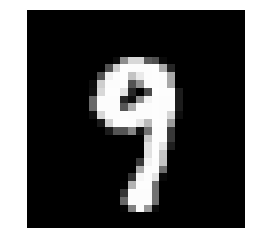

In [26]:
# get predictions
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000

print( "Prediction is: ", np.argmax(pred[test_index]))

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

## Exercise 2

Play with CNN architecture. You can tune the following parameters
* Number of Convolutional layers
* number of Pooling layers
* Size of kernels in Convolutional layer
* Size of pooling operation in Pooling layer
* Add Regularization layer in the network (Dropout)

In [33]:
tf.reset_default_graph()

In [34]:
# Building the model architecture
# Input Layer
model = input_data(shape=[None, 28, 28, 3])
# First Convolution Layer
model = conv_2d(model, 32, 5, activation='relu')
# First Max Pooling
model = max_pool_2d(model, 5)
# second Convolution Layer
model = conv_2d(model, 64, 5, activation = 'relu')
# Second Max Pooling
model = max_pool_2d(model, 5)
# Fully Connected Layer
model = fully_connected(model, 50, activation='relu')
model = dropout(model, 0.9)
model = fully_connected(model, 10, activation='softmax')
model = regression(model, optimizer='adam', loss='categorical_crossentropy',learning_rate=0.001)

In [35]:
model = tflearn.DNN(model)
model.fit(train_x, train_y, n_epoch=100, batch_size=128, show_metric=True)

Training Step: 26799  | total loss: 0.02915 | time: 23.366s
| Adam | epoch: 100 | loss: 0.02915 - acc: 0.9954 -- iter: 34176/34300
Training Step: 26800  | total loss: 0.02624 | time: 23.455s
| Adam | epoch: 100 | loss: 0.02624 - acc: 0.9958 -- iter: 34300/34300
--


In [36]:
model.evaluate(val_x, val_y)

[0.98496598621614939]

In [37]:
pred = model.predict(test_x)

Prediction is:  2


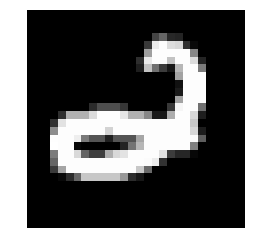

In [38]:
# get predictions
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000

print( "Prediction is: ", np.argmax(pred[test_index]))

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

## END